<a href="https://colab.research.google.com/github/ClaudioFritzen/Relatorio_do_dolar_Ibovespa/blob/main/relatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio Gerar um relatorio que chegue todos os dias na caixa de entrada do email com o fechamento do IBOVESPA e Dólar!


# Passo 1 - Importar os módulos e bibliotecas.
# Passo 2 - Pegar dados do Ibovespa e do Dólar no Yahoo Finance

# Passo 3 - Manipular os dados para deixa-los nos formatos necessários

# Passo 4 - Calcular o retorno diário, mensal e anual.

# Passo 5 - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto anexado no e-mail.

# Passo 6 - Fazer os gráficos de ativos

# Passo 7 - Enviar o e-mail.


In [43]:
!pip install yfinance==0.1.74
!pip install mplcyberpunk
#!pip install pywin32


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import pandas as pd
import datetime 
import yfinance as yf
#from matplotlib import pyploy as plt
import mplcyberpunk
#import win32com.client as win32

In [47]:
!pip install matplotlib
import matplotlib.pyplot as plt
#from matplotlib import pyploy as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Passo 2: Pegar dados no Yahoo Finance

In [48]:
nome_das_pessoas = ['Deixa o like', 'Curti video']
print(nome_das_pessoas[1])

Curti video


In [49]:
codigos_de_negociacao = ['^BVSP', 'BRL=X']

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje )
display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                    Close                     High  \
               BRL=X          ^BVSP     BRL=X          ^BVSP     BRL=X   
Date                                                                     
2022-02-15  5.214000  114660.000000  5.214000  114660.000000  5.219900   
2022-02-16  5.157900  115181.000000  5.157900  115181.000000  5.184725   
2022-02-17  5.135800  113528.000000  5.135800  113528.000000  5.180000   
2022-02-18  5.170600  112768.000000  5.170600  112768.000000  5.175100   
2022-02-21  5.137500  111725.000000  5.137500  111725.000000  5.149900   
...              ...            ...       ...            ...       ...   
2023-02-09  5.199500  107783.000000  5.199500  107783.000000  5.274000   
2023-02-10  5.289500  108150.000000  5.289500  108150.000000  5.304566   
2023-02-13  5.213483  108846.000000  5.213483  108846.000000  5.221400   
2023-02-14  5.158400  107659.000000  5.158400  107659.000000  5.180900   
2023-02-15  5.211800  110034.429688  5.211800  110034.429688  5.239300   

                                Low                     Open               \
                    ^BVSP     BRL=X          ^BVSP     BRL=X        ^BVSP   
Date                                                                        
2022-02-15  114819.000000  5.166288  113882.000000  5.213700  113905.0000   
2022-02-16  115734.000000  5.143800  114816.000000  5.158000  114830.0000   
2022-02-17  115214.000000  5.121471  113389.000000  5.133567  115181.0000   
2022-02-18  114213.000000  5.116900  112701.000000  5.168756  113534.0000   
2022-02-21  113405.000000  5.074800  111608.000000  5.136400  112880.0000   
...                   ...       ...            ...       ...          ...   
2023-02-09  110046.000000  5.170100  107781.000000  5.199500  109952.0000   
2023-02-10  108647.000000  5.225173  107620.000000  5.289500  108002.0000   
2023-02-13  109193.000000  5.159000  107420.000000  5.213483  108074.0000   
2023-02-14  109564.000000  5.126578  107557.000000  5.158400  108839.0000   
2023-02-15  110183.226562  5.190300  107266.632812  5.205100  107848.8125   

           Volume              
            BRL=X       ^BVSP  
Date                           
2022-02-15      0  11649600.0  
2022-02-16      0  12052100.0  
2022-02-17      0  10807500.0  
2022-02-18      0  11300700.0  
2022-02-21      0   7864900.0  
...           ...         ...  
2023-02-09      0  12956000.0  
2023-02-10      0  14458000.0  
2023-02-13      0   9973600.0  
2023-02-14      0  11894600.0  
2023-02-15      0         0.0  

[262 rows x 12 columns]

# Passo 3.1 Manipulando os dados - seleção e exclusão de dados


In [50]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = [ 'dolar', 'ibovespa']


# tratamento de dados 
# excluindo os dados ausentes na tabela
dados_fechamento = dados_fechamento.dropna()

dados_fechamento.head(50)
#dados_fechamento

,dolar,ibovespa
Date,,
2022-02-15,5.214000,114660.0
2022-02-16,5.157900,115181.0
2022-02-17,5.135800,113528.0
2022-02-18,5.170600,112768.0
2022-02-21,5.137500,111725.0
2022-02-22,5.102700,112892.0
2022-02-23,5.057100,112008.0
2022-02-24,5.008700,111592.0
2022-02-25,5.122200,113142.0


Passo 3.2 Manipulando os dados - Criando tabelas com outro timeframes

In [51]:
# q = quarter m, Y
dados_anuais = dados_fechamento.resample("Y").last()
#dados_anuais

dados_mensais = dados_fechamento.resample('M').last()
dados_mensais


,dolar,ibovespa
Date,,
2022-02-28,5.1222,113142.000000
2022-03-31,4.7697,119999.000000
2022-04-30,4.9378,107876.000000
2022-05-31,4.7524,111351.000000
2022-06-30,5.1809,98542.000000
2022-07-31,5.1827,103165.000000
2022-08-31,5.1219,109523.000000
2022-09-30,5.3962,110037.000000
2022-10-31,5.2885,116037.000000


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos.


In [52]:
retorno_anual = dados_anuais.pct_change().dropna()

retorno_mensal = dados_mensais.pct_change().dropna()
retorno_mensal



,dolar,ibovespa
Date,,
2022-03-31,-0.068818,0.060605
2022-04-30,0.035243,-0.101026
2022-05-31,-0.037547,0.032213
2022-06-30,0.090165,-0.115033
2022-07-31,0.000347,0.046914
2022-08-31,-0.011731,0.061629
2022-09-30,0.053554,0.004693
2022-10-31,-0.019959,0.054527
2022-11-30,-0.003839,-0.030602


In [53]:
# diario
retorno_diario = dados_fechamento.pct_change().dropna()
print(f'Seu retorno diario {retorno_diario}')
retorno_diario 

Seu retorno diario                dolar  ibovespa
Date                          
2022-02-16 -0.010760  0.004544
2022-02-17 -0.004285 -0.014351
2022-02-18  0.006776 -0.006694
2022-02-21 -0.006402 -0.009249
2022-02-22 -0.006774  0.010445
...              ...       ...
2023-02-09 -0.001881 -0.019102
2023-02-10  0.017309  0.003405
2023-02-13 -0.014371  0.006436
2023-02-14 -0.010565 -0.010905
2023-02-15  0.010352  0.022064

[251 rows x 2 columns]


,dolar,ibovespa
Date,,
2022-02-16,-0.010760,0.004544
2022-02-17,-0.004285,-0.014351
2022-02-18,0.006776,-0.006694
2022-02-21,-0.006402,-0.009249
2022-02-22,-0.006774,0.010445
...,...,...
2023-02-09,-0.001881,-0.019102
2023-02-10,0.017309,0.003405
2023-02-13,-0.014371,0.006436


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano


In [54]:
# loc  -> referenciar elementos a partir do nome
# iloc -> selecionar elementos como uma matriz

dia_08_fevereiro = retorno_diario.loc['2023-02-08', 'dolar']
dia_08_fevereiro = dia_08_fevereiro * 100
print(dia_08_fevereiro)

retorno_ibov = retorno_diario.iloc[-1, 1]
print(retorno_ibov)

1.2359846784196327
0.02206438558318391


In [55]:

# retorno diario
retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]


print(f'Ultima atualização do dolar no dia {retorno_diario_dolar * 100}')
print(f'Ultima atualização do IBOVESPA no dia {retorno_diario_ibov * 100}')




Ultima atualização do dolar no dia 1.0352054719429793
Ultima atualização do IBOVESPA no dia 2.206438558318391


In [56]:
retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibovespa = retorno_mensal.iloc[-1, 1]

print(f'Cotação do $ dolar no último mês {retorno_mensal_dolar}')
print(f'Cotação da IBOVESPA no último mês {retorno_mensal_ibovespa}')
#retorno_mensal_dolar
#retorno_mensal_ibovespa

Cotação do $ dolar no último mês 0.018944648799078756
Cotação da IBOVESPA no último mês -0.030806911817813476


In [57]:
retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibovespa = retorno_anual.iloc[-1, 1]
retorno_anual_ibovespa
#retorno_anual_dolar

3.117019294562873e-05

In [58]:
retorno_mensal_dolar = round(retorno_mensal_dolar * 100, 2)
retorno_mensal_dolar

1.89

In [59]:
retorno_mensal_ibovespa = round(retorno_mensal_ibovespa * 100, 2)
retorno_mensal_ibovespa

-3.08

In [60]:
retorno_anual_dolar = round(retorno_anual_dolar * 100, 2)
retorno_anual_dolar

-1.04

In [61]:
retorno_anual_ibovespa = round((retorno_anual_ibovespa * 100), 2)
retorno_anual_ibovespa

0.0

In [62]:
retorno_diario_dolar = round((retorno_diario_dolar), 2)
retorno_diario_dolar

0.01

# Fazer os graficos da performace dos ultimos ativos

In [63]:
dados_fechamento = round(dados_fechamento,2)
dados_fechamento

,dolar,ibovespa
Date,,
2022-02-15,5.21,114660.00
2022-02-16,5.16,115181.00
2022-02-17,5.14,113528.00
2022-02-18,5.17,112768.00
2022-02-21,5.14,111725.00
...,...,...
2023-02-09,5.20,107783.00
2023-02-10,5.29,108150.00
2023-02-13,5.21,108846.00


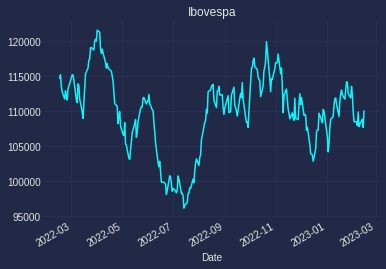

In [64]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)

plt.title('Ibovespa')
#dados_fechamento.plot(y= 'dolar', use_index = True, legend = False)

# salvando a img do grafico como png
plt.savefig('ibovespa', dpi=300)
plt.show()

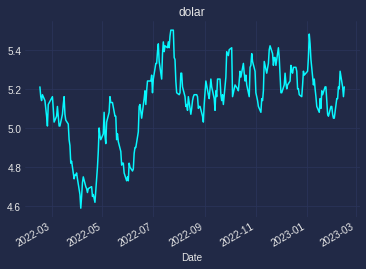

In [65]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)

plt.title('dolar')
#dados_fechamento.plot(y= 'dolar', use_index = True, legend = False)

# salvando a img do grafico como png
plt.savefig('dolar', dpi=300)
plt.show()

In [66]:
# Enviar o email 
import smtplib

In [71]:
import smtplib
import email.message


def enviar_email(dados_fechamento):
    corpo_email = f"""
              <p> Olá aqui esta um resumo diario da cotação do Dolar $ {dados_fechamento} </p>
              <p> Dolar esta abaixo de R$ 5.20. Cotação atual: R$ {dados_fechamento} </p>
              """
    msg = email.message.Message()
    msg ['Subject'] = "Dolar está abaixo de R$ 5.20" #assunto
    msg ['From'] = 'sdfritzen96@gmail.com' # de quem
    msg ['To'] = 'sdfritzen96@gmail.com' # para quem
    password = 'sua senha do app' # senha do app /// nao é a senha do teu email
    msg.add_header('Content-Type', 'text/html')
    msg.set_payload(corpo_email)
    s = smtplib.SMTP('smtp.gmail.com: 587')
    s.starttls()
    # Login Credencias para enviar o email
    s.login(msg ['From'], password)
    s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    print(" Email enviado")
#if dados_fechamento < 5.20:
 #   enviar_email(dados_fechamento)